# PAYEMS (Jobs Report) February 2017

http://www.businessinsider.com/us-jobs-report-february-2017-2017-3

http://www.businessinsider.com/trump-response-to-jobs-report-sean-spicer-2017-3

In [1]:
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## All Employees: Total Nonfarm Payrolls (PAYEMS)

PAYEMS is the data set the **US Bureau of Labor Statistics** reports every month.

Consists of All Employees: Total Nonfarm, commonly known as Total Nonfarm Payroll, is a measure of the number of U.S. workers in the economy that excludes proprietors, private household employees, unpaid volunteers, farm employees, and the unincorporated self-employed. This measure accounts for approximately 80 percent of the workers who contribute to Gross Domestic Product (GDP).

The data is available from the repository of the **FEDERAL RESERVE BANK OF ST. LOUIS - Economic Research** site   https://fred.stlouisfed.org/series/PAYEMS 

The source of the data is **United States Bureau of Labor Statistics** https://www.bls.gov/

In [2]:
PAYEMS = web.DataReader(["PAYEMS"], "fred", start=datetime.datetime(1990, 1, 1), end=datetime.datetime(2017, 3, 1))

## Moving Average Ribbon
Shows the rolling means for from 3 months to 36 months in increments of 3 months.  When rolling means are parallel shows a trend.

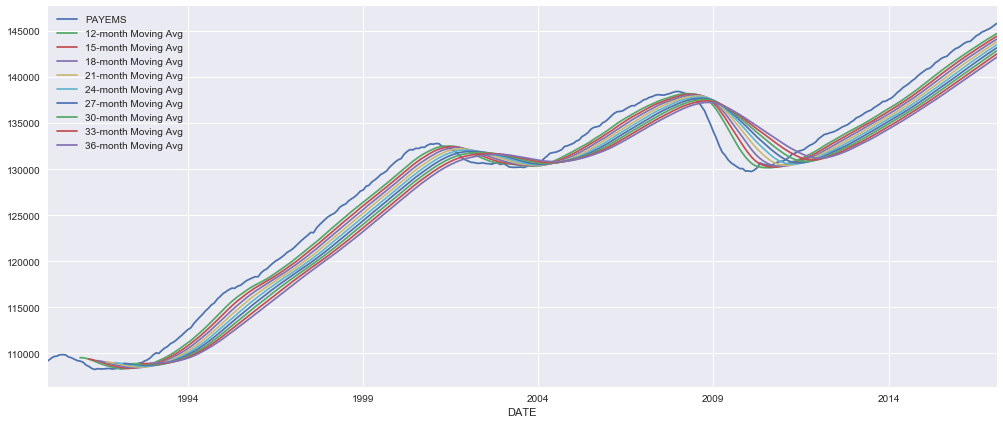

In [13]:
PAYEMS.PAYEMS.plot(legend=True)
for n in range(12,39,3):
    PAYEMS['{}-month Moving Avg'.format(n)] = PAYEMS.PAYEMS.rolling(window=n).mean()
    PAYEMS['{}-month Moving Avg'.format(n)].plot(figsize=(17,7),legend=True)
plt.show()

## May Have Been Phony in the Past? 
**February 2017** Employment growth rate results looks very much like previous results since 2012.
Actually, monthly growth rates for every month are comparable year-over-year since 2012.

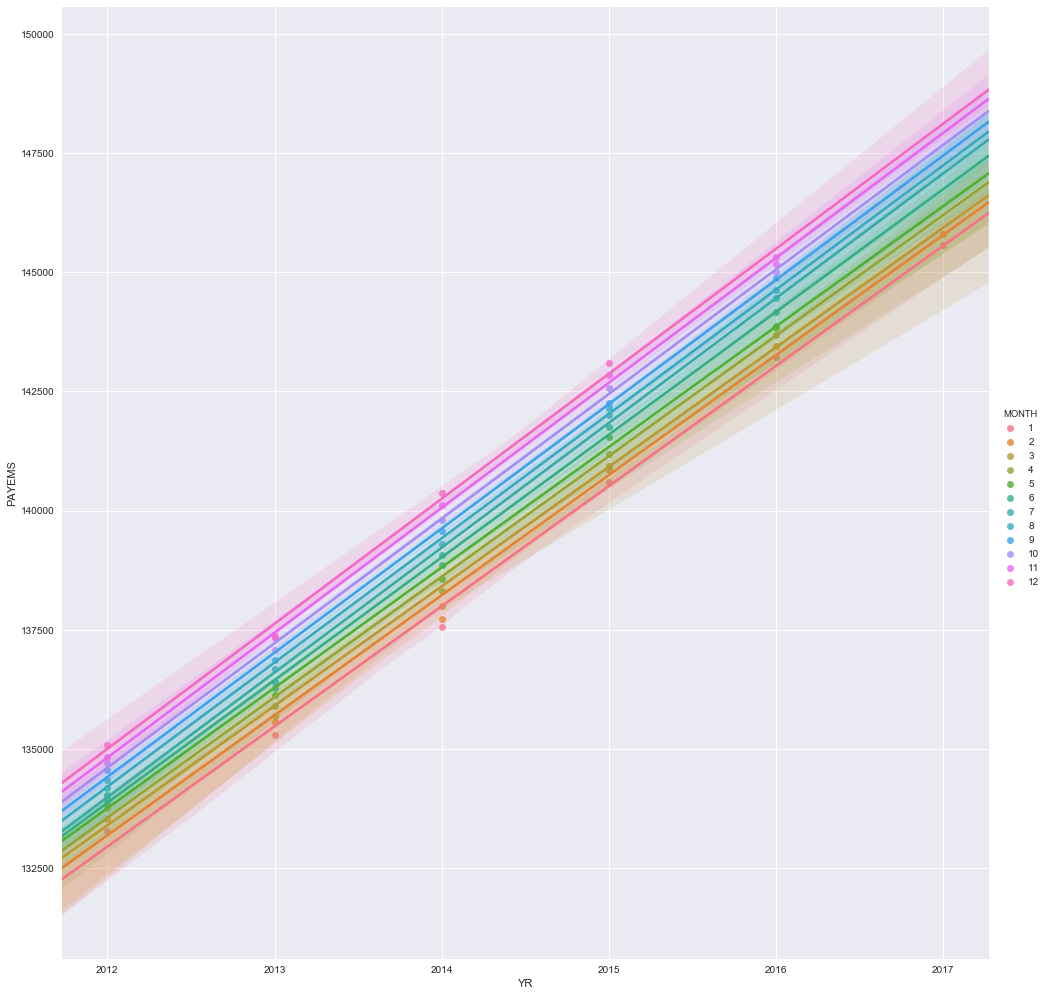

In [5]:
PAYEMS['PAYEMS_DIFF'] = PAYEMS.PAYEMS.diff()
PAYEMS['PAYEMS_PCT_DIFF'] = PAYEMS.PAYEMS_DIFF / PAYEMS.PAYEMS * 100
PAYEMS['YR'] = PAYEMS.index.year
PAYEMS['MONTH'] = PAYEMS.index.month

sns.lmplot(x="YR", y="PAYEMS", hue="MONTH", data=PAYEMS[PAYEMS.index.year>=2012], size=14, ci=95)
plt.show()

## Looking at just February PAYEMS since 2012

1. The Employment report for **February 2017** were good, but in line with Februaries since 2012.
2. The expected additions for **February 2017** were 200K, a little understated when in February 2015 it was 238K and 237K for 2016.

In [14]:
FEB_PAYEMS = PAYEMS[(PAYEMS.MONTH == 2) & (PAYEMS.index.year >= 2012)]
FEB_PAYEMS[['PAYEMS']]

,PAYEMS
DATE,
2012-02-01,133525
2013-02-01,135569
2014-02-01,137715
2015-02-01,140844
2016-02-01,143448
2017-02-01,145798


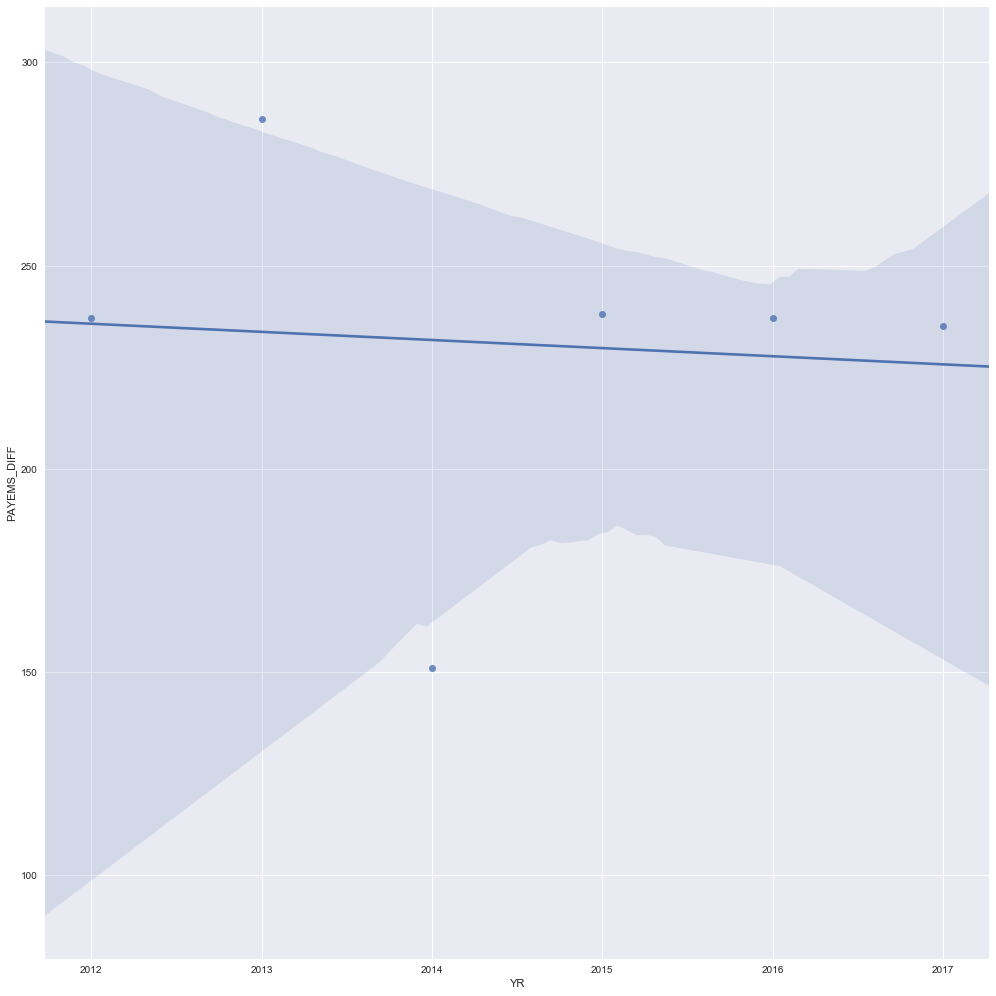

In [7]:
sns.lmplot(x="YR", y="PAYEMS_DIFF", data=FEB_PAYEMS.reset_index(), size=14, ci=95)
plt.show()